# Importando as bibliotecas

In [78]:
import pandas as pd
import plotly.express as px
import missingno as msno

# Importando as bases de dados

## Base de dados

Base de dados loja de jogos on-line.

In [79]:
dados = pd.DataFrame(pd.read_csv("../1_bases_originais/original.csv"))

In [80]:
dados

,nome,porcentagem_desconto,preço,tipo,sistema,plataforma
0,Mario Kart™ 8 Deluxe,0,"R$ 299,00",Padrão,nintendo switch,nintendo
1,Minecraft: Java and Bedrock Edition,0,"R$ 129,00",Padrão,"windows,linux,mac",pc
2,Men of War: Assault Squad 2 - War Chest Edition,-77%,"R$ 32,04",Padrão,"steam,windows",pc
3,NARUTO SHIPPUDEN: Ultimate Ninja STORM 4 - Roa...,0,"R$ 122,16",Padrão,"steam,windows",pc
4,Naruto Shippuden: Ultimate Ninja Storm 4,0,"R$ 97,00",Padrão,"steam,windows",pc
...,...,...,...,...,...,...
195,Metal Gear Rising - Revengeance,0,"R$ 49,99",Padrão,"steam,windows",pc
196,Xbox - Cartão Presente Digital 15 Reais,0,"R$ 15,00",Padrão,"windows,xbox one,xbox series s x","xbox,pc"
197,Warhammer: Chaosbane - Slayer Edition,0,"R$ 75,49",Padrão,"steam,windows",pc
198,Xbox - Cartão Presente Digital 70 Reais,0,"R$ 70,00",Padrão,"windows,xbox one,xbox series s x","xbox,pc"


In [81]:
# verificando o tamanho da base em linhas e colunas
dados.shape

(200, 6)

# Primeiros tratamentos

## Resetando o index e eliminando os duplicados

In [82]:
dados.index.value_counts()

0      1
137    1
127    1
128    1
129    1
      ..
69     1
70     1
71     1
72     1
199    1
Length: 200, dtype: int64

In [83]:
dados.reset_index(drop=True).index.value_counts()

0      1
137    1
127    1
128    1
129    1
      ..
69     1
70     1
71     1
72     1
199    1
Length: 200, dtype: int64

In [84]:
dados.duplicated().sum()

0

In [85]:
dados.loc[dados.nome.duplicated()==True]

,nome,porcentagem_desconto,preço,tipo,sistema,plataforma


In [86]:
# criando um novo objeto dados, resetando o index do objeto anterior e eliminando duplicados
dados = dados.reset_index(drop=True).drop_duplicates()
dados.shape

(200, 6)

## Retirando variáveis

No pandas, utilizamos o comando .drop para eliminar as colunas que não pretendemos trabalhar.

In [87]:
#Não será necessário remoção de colunas

## Editando os nomes das colunas

### Nomes das colunas em minusculo

In [88]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preço', 'tipo', 'sistema',
       'plataforma'],
      dtype='object')

In [89]:
dados.columns = dados.columns.str.lower()

### Substituindo caracteres especiais das colunas

In [90]:
dados.columns = dados.columns.str.replace('ç', 'c')

In [91]:
dados.columns

Index(['nome', 'porcentagem_desconto', 'preco', 'tipo', 'sistema',
       'plataforma'],
      dtype='object')

### Substituindo caracteres especiais das linhas de colunas específicas

In [92]:
dados.preco=dados.preco.str.replace('\W','')
dados.preco=dados.preco.str.replace('R','')

C:\Users\ionaf\AppData\Local\Temp\ipykernel_16140\1570654488.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



### Substituindo caracteres especiais de toda a base de dados

In [93]:
dados = dados.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                ':' : '',
                '-' : '',
                "’" : "",
                "'" : "",
                "/" : "",
                "%" : "",
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o"               
              }, regex=True)

## Convertendo preços para númerico

In [94]:
dados.preco = pd.to_numeric(dados.preco, errors='coerce')

## Dados Missing

<Axes: >

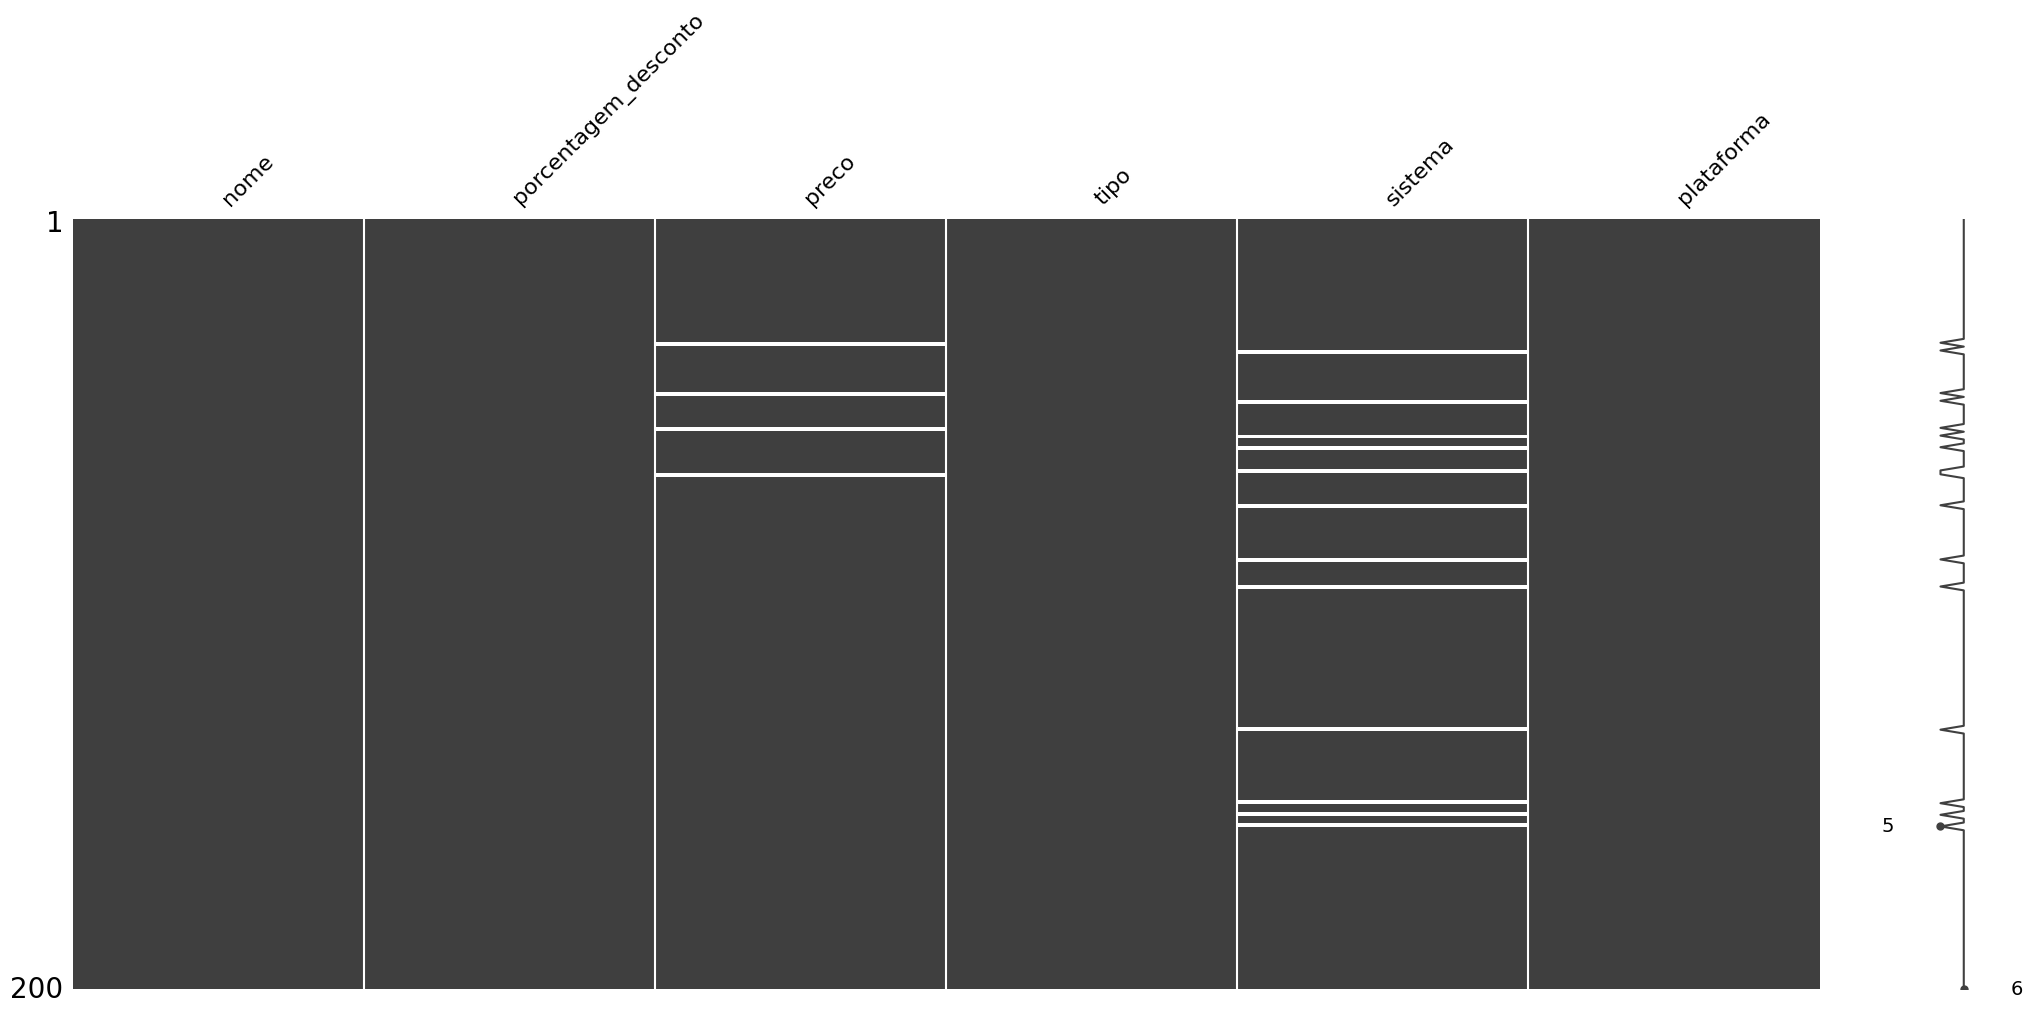

In [95]:
msno.matrix(dados)

<Axes: >

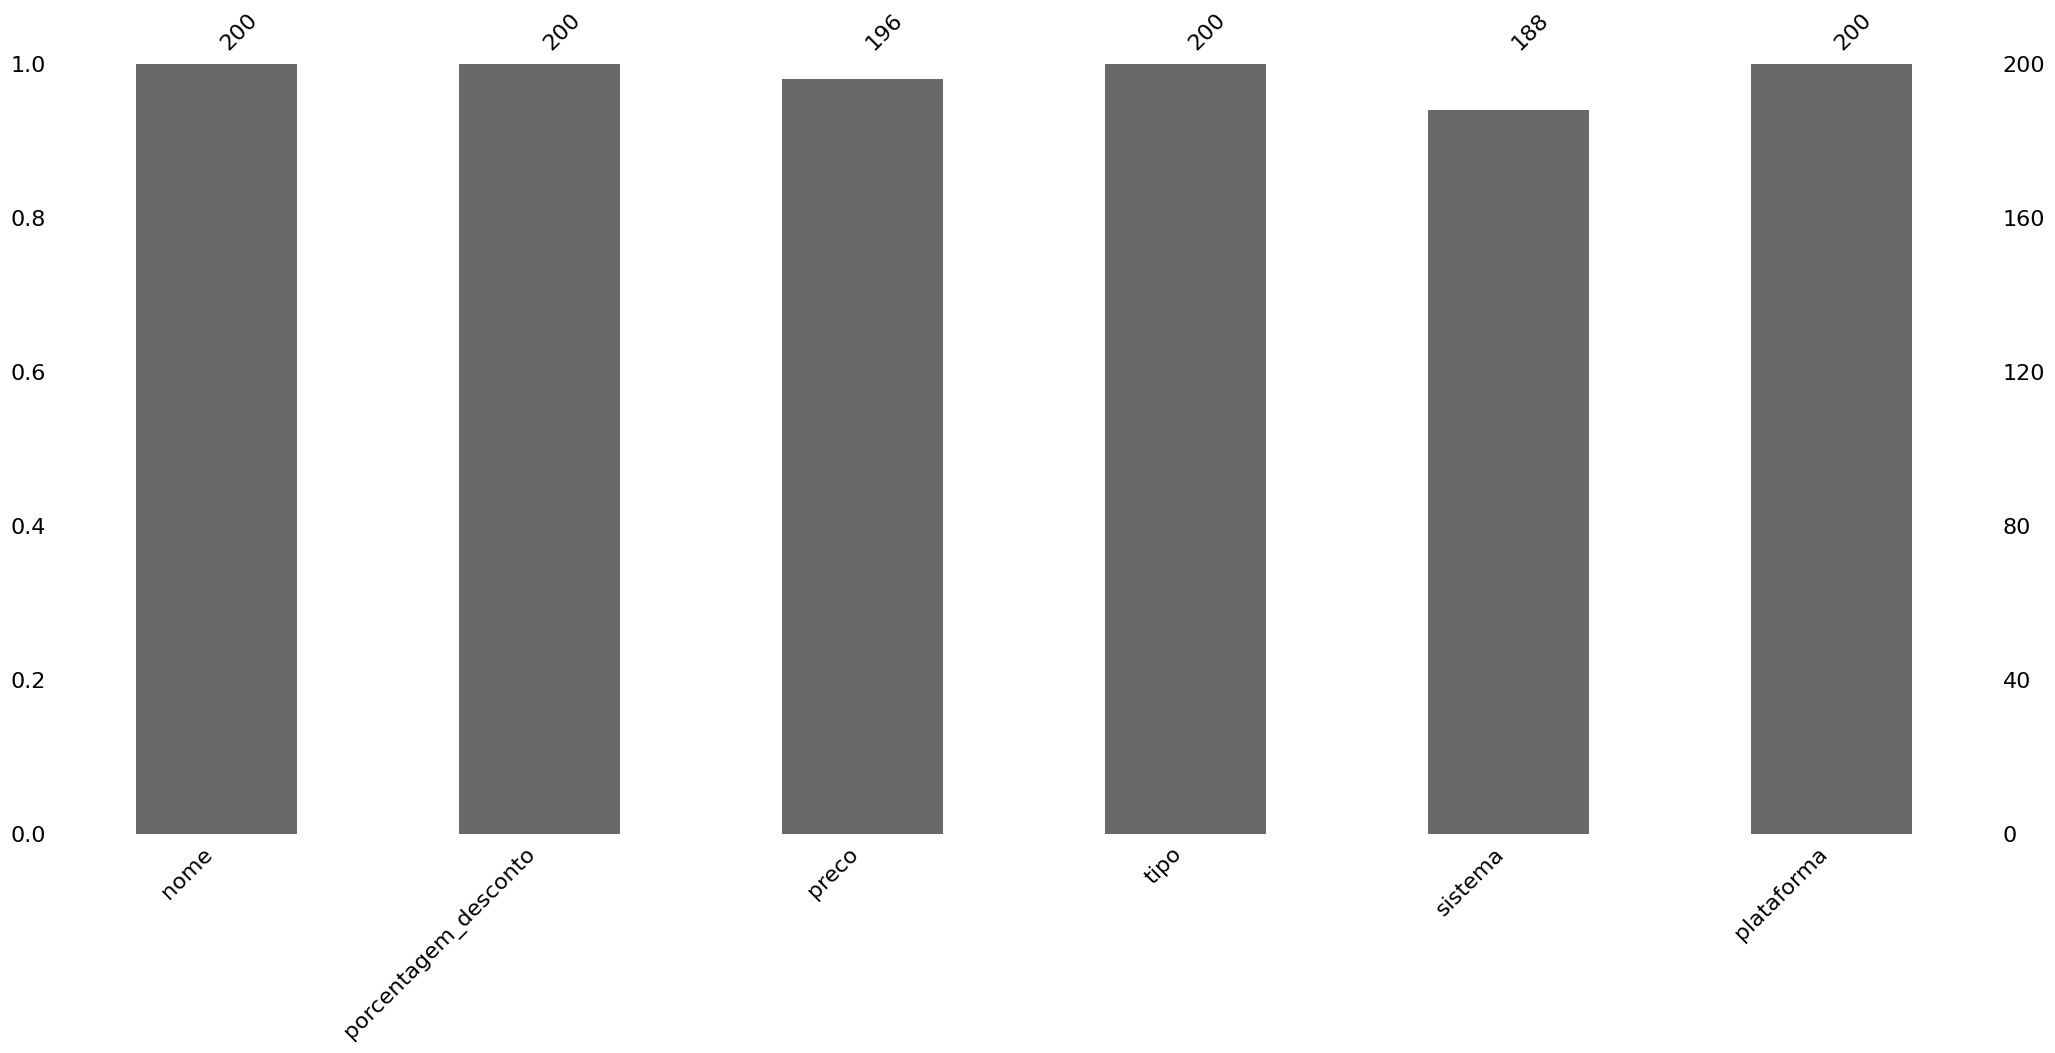

In [96]:
msno.bar(dados)

### Justificativa da remoção de dados nulos
Em análise dos dados, entendemos que os itens que retornaram indisponíveis da raspagem de dados, não fariam sentido serem expostos ou estarem contidos na base tratada.

In [97]:
dados = dados.dropna()
dados.isna().sum()

nome                    0
porcentagem_desconto    0
preco                   0
tipo                    0
sistema                 0
plataforma              0
dtype: int64

### Resetando index

In [98]:
dados = dados.reset_index(drop=True)
dados

,nome,porcentagem_desconto,preco,tipo,sistema,plataforma
0,Mario Kart™ 8 Deluxe,0,29900.0,Padrao,nintendo switch,nintendo
1,Minecraft Java and Bedrock Edition,0,12900.0,Padrao,"windows,linux,mac",pc
2,Men of War Assault Squad 2 War Chest Edition,77,3204.0,Padrao,"steam,windows",pc
3,NARUTO SHIPPUDEN Ultimate Ninja STORM 4 Road ...,0,12216.0,Padrao,"steam,windows",pc
4,Naruto Shippuden Ultimate Ninja Storm 4,0,9700.0,Padrao,"steam,windows",pc
...,...,...,...,...,...,...
179,Metal Gear Rising Revengeance,0,4999.0,Padrao,"steam,windows",pc
180,Xbox Cartao Presente Digital 15 Reais,0,1500.0,Padrao,"windows,xbox one,xbox series s x","xbox,pc"
181,Warhammer Chaosbane Slayer Edition,0,7549.0,Padrao,"steam,windows",pc
182,Xbox Cartao Presente Digital 70 Reais,0,7000.0,Padrao,"windows,xbox one,xbox series s x","xbox,pc"


### Transformando o preço para valor monetário

In [99]:
dados['preco'] = dados['preco'].div(100)
dados.preco

0      299.00
1      129.00
2       32.04
3      122.16
4       97.00
        ...  
179     49.99
180     15.00
181     75.49
182     70.00
183    161.20
Name: preco, Length: 184, dtype: float64

## Tranformando texto para lower case e criando padrão de uso

In [100]:
dados.nome = dados.nome.str.lower()
dados.tipo = dados.tipo.str.lower()
dados

,nome,porcentagem_desconto,preco,tipo,sistema,plataforma
0,mario kart™ 8 deluxe,0,299.00,padrao,nintendo switch,nintendo
1,minecraft java and bedrock edition,0,129.00,padrao,"windows,linux,mac",pc
2,men of war assault squad 2 war chest edition,77,32.04,padrao,"steam,windows",pc
3,naruto shippuden ultimate ninja storm 4 road ...,0,122.16,padrao,"steam,windows",pc
4,naruto shippuden ultimate ninja storm 4,0,97.00,padrao,"steam,windows",pc
...,...,...,...,...,...,...
179,metal gear rising revengeance,0,49.99,padrao,"steam,windows",pc
180,xbox cartao presente digital 15 reais,0,15.00,padrao,"windows,xbox one,xbox series s x","xbox,pc"
181,warhammer chaosbane slayer edition,0,75.49,padrao,"steam,windows",pc
182,xbox cartao presente digital 70 reais,0,70.00,padrao,"windows,xbox one,xbox series s x","xbox,pc"


## Tratamento de Outlier

Ao realizar análise dos outlier da base, verificamos que apesar de fora do desvio padrão, estes dados não deveriam ser descartados, uma vez que representam o valor real do item.

In [101]:
px.box(dados.preco)

## Salvar base de dados tratadas

In [102]:
dados.to_csv("../2_bases_tratadas/base_tratada.csv", index=True)